***Activity Day*** - Date of activity performed

***Workout Type*** - This can range from Outdoor Running, Treadmill, Outdoor Cycling, Indoor Cycling, Freestyle, Walking, Trekking, Trail Run, Pool
Swimming, Open Water, Cricket

***Distance*** - Distance Covered (in km)

***Time*** - Duration of the workout (in minutes)

***Calories*** - Total number of active calories burned (kcal)

***Total Steps*** - Steps count per day

***Avg Speed*** - Average speed (km/hour)

***Avg Cadence*** - Average Stride Rate, number of steps a runner takes per minute (SPM)

***Max Cadence*** - Maximum number of steps taken per minute in the entire workout

***Avg Pace*** - Average time taken to cover a kilometre

***Max Pace*** - Maximum time taken to cover a kilometre

***Min Pace*** - Minimum time taken to cover a kilometre

***Avg Heart Rate*** - Average BPM (beats per minute) whilst the workout

***Max Heart Rate*** - Maximum BPM (beats per minute) during the workout

***Min Heart Rate*** - Minimum BPM (beats per minute) during the workout

***VO2 max*** - Maximum volume of oxygen used by the body while exercising

***Anaerobic*** - Includes explosive exercises like sprinting which involve quick bursts of energy and are performed at a maximum for a short amount of time

***Aerobic*** - These include cycling or brisk walking and are a type of cardiovascular conditioning

***Intensive*** - High intense workouts like swimming, sprinting

***Light*** - Low intense workouts like freestyle/walking

## IMPORTING LIBARARIES :

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

#Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Feature engineering
from sklearn.feature_selection import mutual_info_regression

#For Fitting
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## READING DATASET :

In [ ]:
data = pd.read_csv('/content/Activity_Dataset_V1.csv')

## SHAPE OF DATASET :

In [ ]:
data.shape


(1000, 21)

## Overview of the whole Project :

In [ ]:
data.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,1/1/2022,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122,103,19,28,2,7,50
1,1,1/1/2022,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122,100,42,28,2,29,88
2,2,1/1/2022,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90,100,1,32,0,22,43
3,3,1/1/2022,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58:00,7:58,83.0,85,81,3,22,0,24,65
4,4,1/1/2022,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166,110,7,0,5,21,88


In [ ]:
data.tail()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
995,995,2/14/2022,Pool Swimming,6.92,101,313,NaN,28.66,173.30,234.73,...,NaN,NaN,133.5,175,92,22,20,15,21,61
996,996,2/14/2022,Freestyle,9.48,61,219,NaN,9.23,114.34,109.32,...,NaN,NaN,103.0,122,84,18,28,2,17,86
997,997,2/14/2022,Freestyle,3.30,40,169,NaN,7.37,133.97,122.96,...,NaN,NaN,114.5,122,107,18,28,2,23,98
998,998,2/14/2022,Indoor Cycling,4.40,47,52,NaN,10.75,147.65,116.51,...,NaN,NaN,96.0,90,102,45,32,0,13,57
999,999,2/14/2022,Indoor Cycling,1.57,116,106,NaN,25.37,143.41,182.80,...,NaN,NaN,96.5,90,103,14,32,0,24,83


In [ ]:
data.columns

Index(['Unnamed: 0', 'activity_day', 'workout_type', 'distance', 'time',
       'calories', 'total_steps', 'avg_speed', 'avg_cadence', 'max_cadence',
       'avg_pace', 'max_pace', 'min_pace', 'avg_heart_rate', 'max_heart_rate',
       'min_heart_rate', 'vo2_max(%)', 'aerobic(%)', 'anaerobic(%)',
       'intensive(%)', 'light(%)'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1000 non-null   int64  
 1   activity_day    1000 non-null   object 
 2   workout_type    1000 non-null   object 
 3   distance        1000 non-null   float64
 4   time            1000 non-null   int64  
 5   calories        1000 non-null   int64  
 6   total_steps     554 non-null    float64
 7   avg_speed       1000 non-null   float64
 8   avg_cadence     1000 non-null   float64
 9   max_cadence     1000 non-null   float64
 10  avg_pace        554 non-null    object 
 11  max_pace        554 non-null    object 
 12  min_pace        554 non-null    object 
 13  avg_heart_rate  1000 non-null   float64
 14  max_heart_rate  1000 non-null   int64  
 15  min_heart_rate  1000 non-null   int64  
 16  vo2_max(%)      1000 non-null   int64  
 17  aerobic(%)      1000 non-null   in

In [ ]:
data.describe()

,Unnamed: 0,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
count,1000.000000,1000.000000,1000.000000,1000.000000,554.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,5.243620,71.166000,286.310000,4081.119134,19.765780,107.457870,199.821910,116.282000,136.655000,95.909000,22.322000,24.077000,17.899000,36.236000,50.947000
std,288.819436,2.649774,29.341359,156.278511,1865.429141,10.871037,54.312209,85.397007,20.573679,39.739416,9.450504,12.941166,16.881115,26.864559,18.125254,28.211063
min,0.000000,1.000000,20.000000,10.000000,1571.000000,1.000000,10.130000,50.560000,82.500000,85.000000,80.000000,0.000000,0.000000,0.000000,5.000000,2.000000
25%,249.750000,2.800000,45.000000,155.750000,2790.000000,10.300000,62.530000,129.097500,97.000000,92.000000,88.000000,11.000000,0.000000,0.000000,21.000000,26.000000
50%,499.500000,5.105000,71.000000,290.500000,3444.000000,19.395000,111.065000,198.800000,113.000000,124.000000,96.000000,22.000000,26.000000,7.000000,36.000000,51.000000
75%,749.250000,7.542500,97.000000,415.250000,5028.000000,28.932500,153.605000,274.292500,136.500000,177.000000,104.000000,33.000000,40.000000,15.000000,52.000000,76.000000
max,999.000000,9.990000,120.000000,550.000000,7618.000000,38.900000,199.780000,349.780000,150.500000,190.000000,111.000000,45.000000,50.000000,80.000000,67.000000,100.000000


## **CHECK NULLS:**

In [ ]:
data.isna().sum()

Unnamed: 0          0
activity_day        0
workout_type        0
distance            0
time                0
calories            0
total_steps       446
avg_speed           0
avg_cadence         0
max_cadence         0
avg_pace          446
max_pace          446
min_pace          446
avg_heart_rate      0
max_heart_rate      0
min_heart_rate      0
vo2_max(%)          0
aerobic(%)          0
anaerobic(%)        0
intensive(%)        0
light(%)            0
dtype: int64

In [ ]:
data.isnull().sum()/len(data) * 100

Unnamed: 0         0.0
activity_day       0.0
workout_type       0.0
distance           0.0
time               0.0
calories           0.0
total_steps       44.6
avg_speed          0.0
avg_cadence        0.0
max_cadence        0.0
avg_pace          44.6
max_pace          44.6
min_pace          44.6
avg_heart_rate     0.0
max_heart_rate     0.0
min_heart_rate     0.0
vo2_max(%)         0.0
aerobic(%)         0.0
anaerobic(%)       0.0
intensive(%)       0.0
light(%)           0.0
dtype: float64

**▶ OBSERVATION: The null is found only in column total_steps , avg_pace , max_pace and min_pace which are numerical data with a percentage of 44.6%.**

In [ ]:
data["total_steps"].fillna(data["total_steps"].mean(), inplace=True)

In [ ]:
print(data['max_pace'].value_counts())
print(50*'-')
print(data['min_pace'].value_counts())
print(50*'-')
print(data['avg_pace'].value_counts())

28:58:00    98
27:58:00    98
24:45:00    94
22:02       93
25:50:00    90
27:44:00    81
Name: max_pace, dtype: int64
--------------------------------------------------
7:58    196
7:45     94
7:02     93
6:20     90
6:15     81
Name: min_pace, dtype: int64
--------------------------------------------------
7:58      98
7:59      98
7:55      94
07:015    93
6:48      90
6:44      81
Name: avg_pace, dtype: int64


##**Dropping the unnecessary columns :**

In [ ]:
data.drop(columns = ['Unnamed: 0','avg_pace','max_pace','min_pace','activity_day'],inplace = True)

In [ ]:
data.columns

Index(['workout_type', 'distance', 'time', 'calories', 'total_steps',
       'avg_speed', 'avg_cadence', 'max_cadence', 'avg_heart_rate',
       'max_heart_rate', 'min_heart_rate', 'vo2_max(%)', 'aerobic(%)',
       'anaerobic(%)', 'intensive(%)', 'light(%)'],
      dtype='object')

## **CHECK OUTLIERS :**

In [ ]:
#check columns that contain percentage values
print(data['anaerobic(%)'].max())
print(data['anaerobic(%)'].min())
print(50*'*')
print(data['vo2_max(%)'].max())
print(data['vo2_max(%)'].min())
print(50*'*')
print(data['aerobic(%)'].max())
print(data['aerobic(%)'].min())
print(50*'*')
print(data['intensive(%)'].max())
print(data['intensive(%)'].min())
print(50*'*')
print(data['light(%)'].max())
print(data['light(%)'].min())

80
0
**************************************************
45
0
**************************************************
50
0
**************************************************
67
5
**************************************************
100
2


In [ ]:
columns_to_check = ['total_steps','distance','calories','avg_speed', 'avg_cadence', 'max_cadence',
                    'avg_heart_rate', 'max_heart_rate', 'min_heart_rate']

# Loop through each column
for column in columns_to_check:
    q1 = np.percentile(data[column].dropna(), 25)
    q3 = np.percentile(data[column].dropna(), 75)
    norm_range = (q3 - q1) * 1.5
    lower_outliers = data[data[column] < (q1 - norm_range)]
    upper_outliers = data[data[column] > (q3 + norm_range)]
    outliers = len(lower_outliers) + len(upper_outliers)
    print(f"The number of outliers in {column}: {outliers}")

The number of outliers in total_steps: 0
The number of outliers in distance: 0
The number of outliers in calories: 0
The number of outliers in avg_speed: 0
The number of outliers in avg_cadence: 0
The number of outliers in max_cadence: 0
The number of outliers in avg_heart_rate: 0
The number of outliers in max_heart_rate: 0
The number of outliers in min_heart_rate: 0


In [ ]:
# Specify the columns to cap outliers
columns_to_cap = ['total_steps']

# Loop through each column
for column in columns_to_cap:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = 1.5 * (q3 - q1)

    data[column] = np.where(data[column] < (q1 - iqr), q1 - iqr, data[column])
    data[column] = np.where(data[column] > (q3 + iqr), q3 + iqr, data[column])

##**Feature Extraction:**

In [ ]:
data[["calories"]].describe()

,calories
count,1000.000000
mean,286.310000
std,156.278511
min,10.000000
25%,155.750000
50%,290.500000
75%,415.250000
max,550.000000


In [ ]:
#Finding the number of calories burnt per minute
data["calories_per_minute"] = data["calories"]/data["time"]

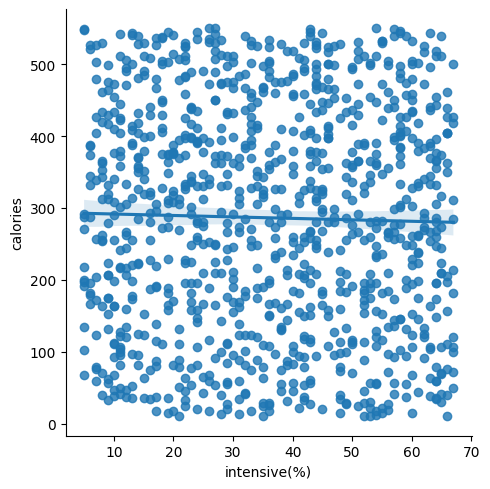

In [ ]:
sns.lmplot(x='intensive(%)',y='calories',data=data,fit_reg=True)

In [ ]:
#divide Calories column into two classes and put them in new column
# 1: normal level for burnt calories
# 2: abnormal level for burnt calories
data["calories_classes"] = 1
data.loc[data["calories"] > 290.5, "calories_classes"] = 2
print(data["calories_classes"].value_counts())

1    500
2    500
Name: calories_classes, dtype: int64


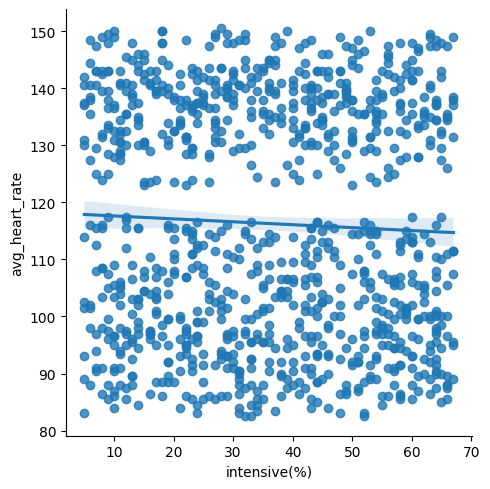

In [ ]:
sns.lmplot(x='intensive(%)',y='avg_heart_rate',data=data,fit_reg=True)

In [ ]:
data['avg_heart_rate'].median()

113.0

In [ ]:
#divide avg_heart_rate column into two classes and put them in new column
# 1 :normal level
# 2: abnormal level
data["heart_level"] = 1
data.loc[data["avg_heart_rate"] > 110,"heart_level"] = 2
print(data["heart_level"].value_counts())

2    538
1    462
Name: heart_level, dtype: int64


##  **Checking Correlation & Making Heatmap :**

<Axes: >

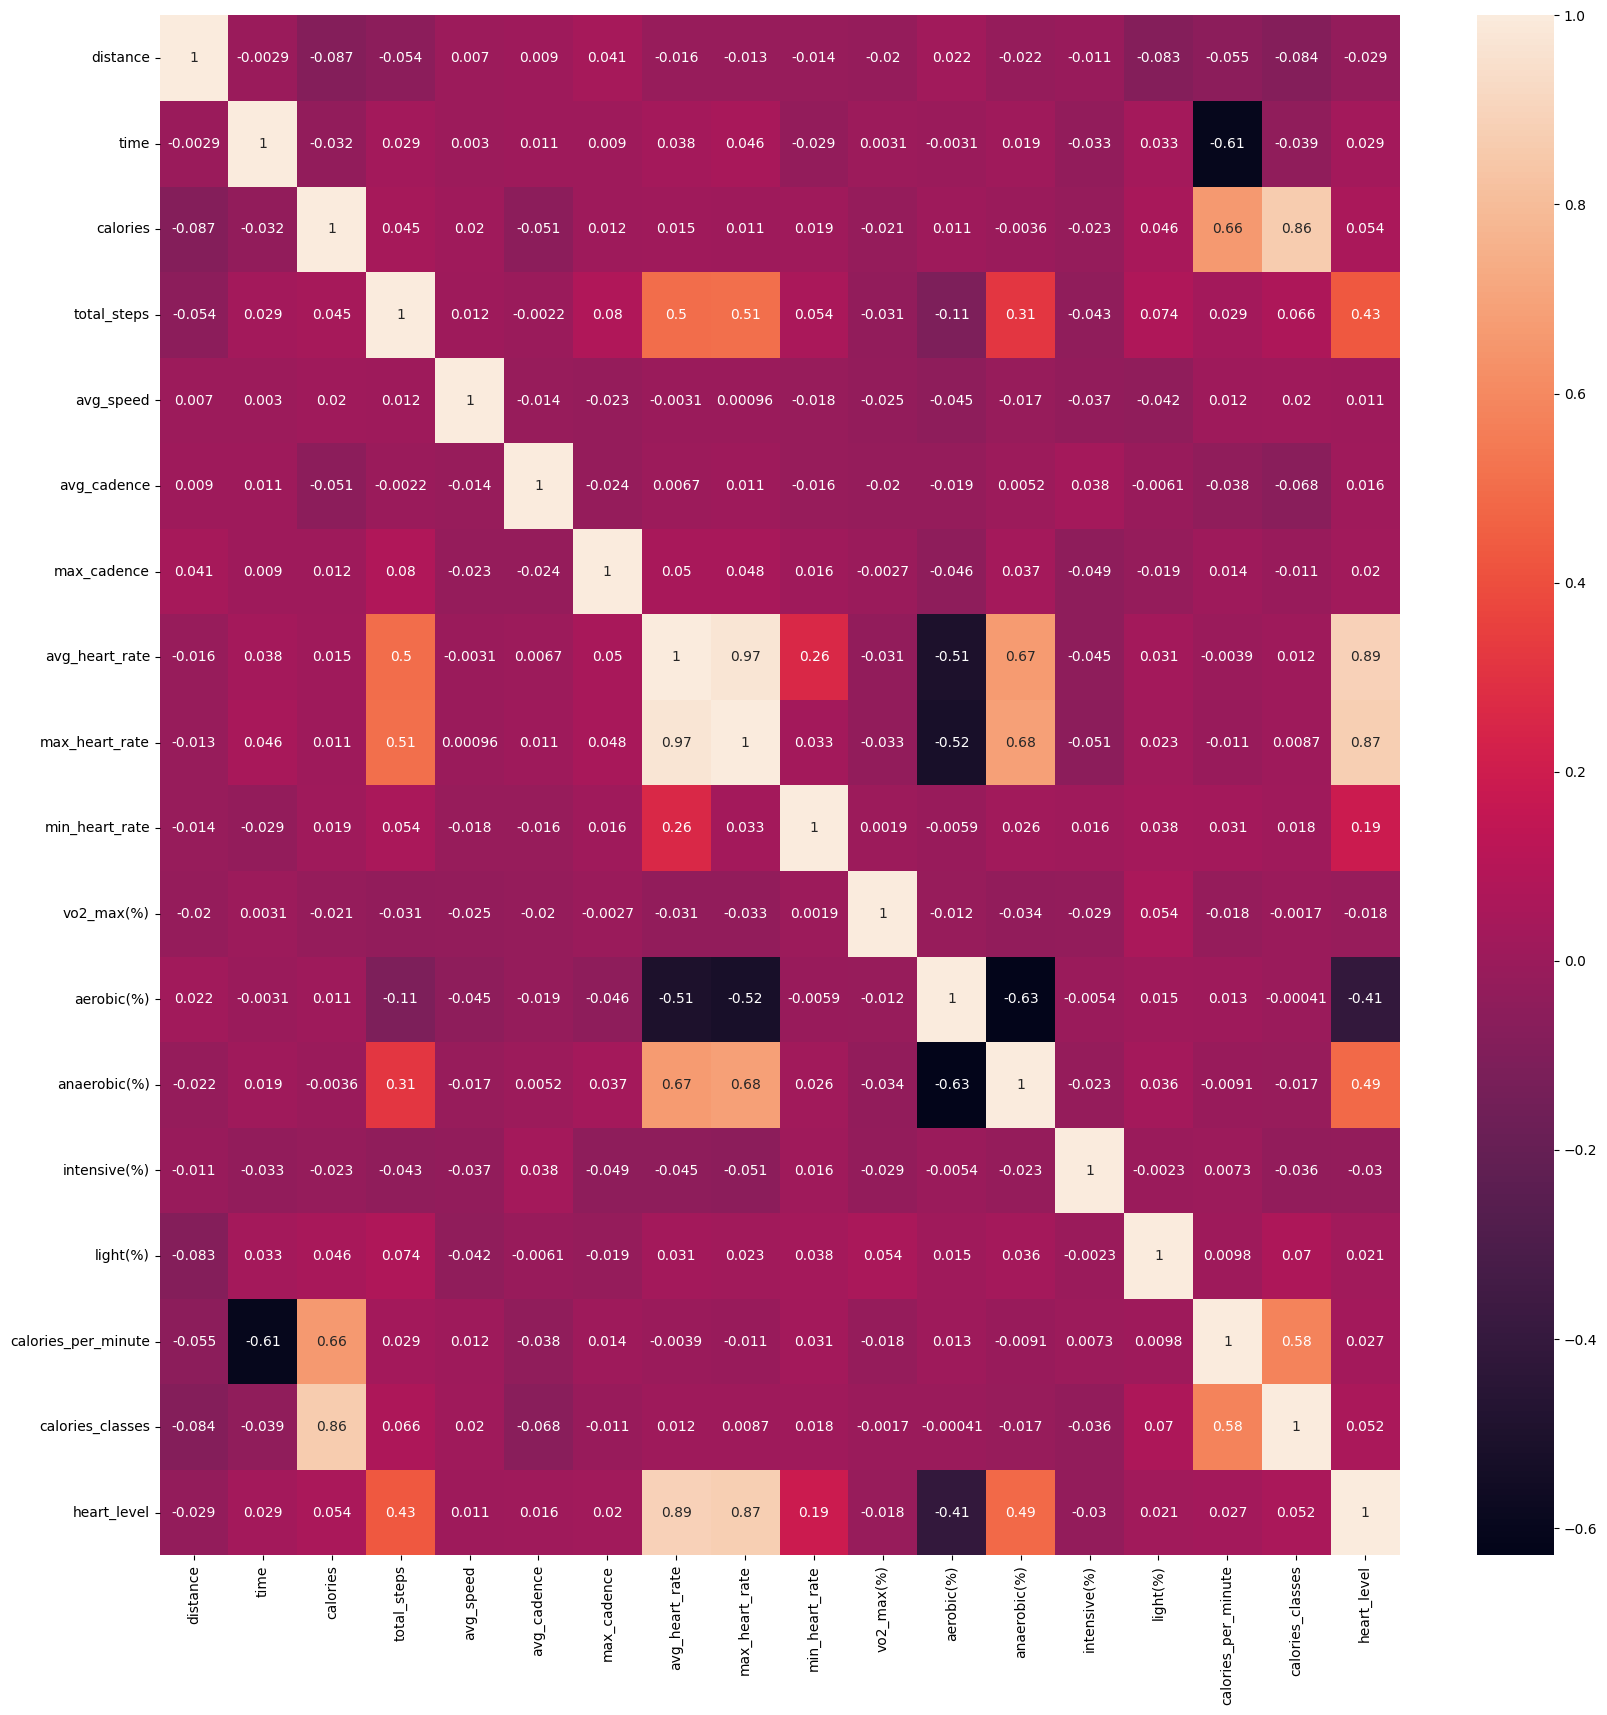

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(data.corr(),annot = True, ax =ax)

In [ ]:
sns.pairplot(data=data)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pd.DataFrame(data['workout_type'].value_counts(dropna=False))

,workout_type
Walking,98
Treadmill,98
Freestyle,96
Pool Swimming,94
Trekking,94
Cricket,93
Open Water,91
Trail Run,90
Outdoor Cycling,85
Outdoor Running,81


The treadmill and the walk are the two types of activities that are practiced most frequently in the dataset.



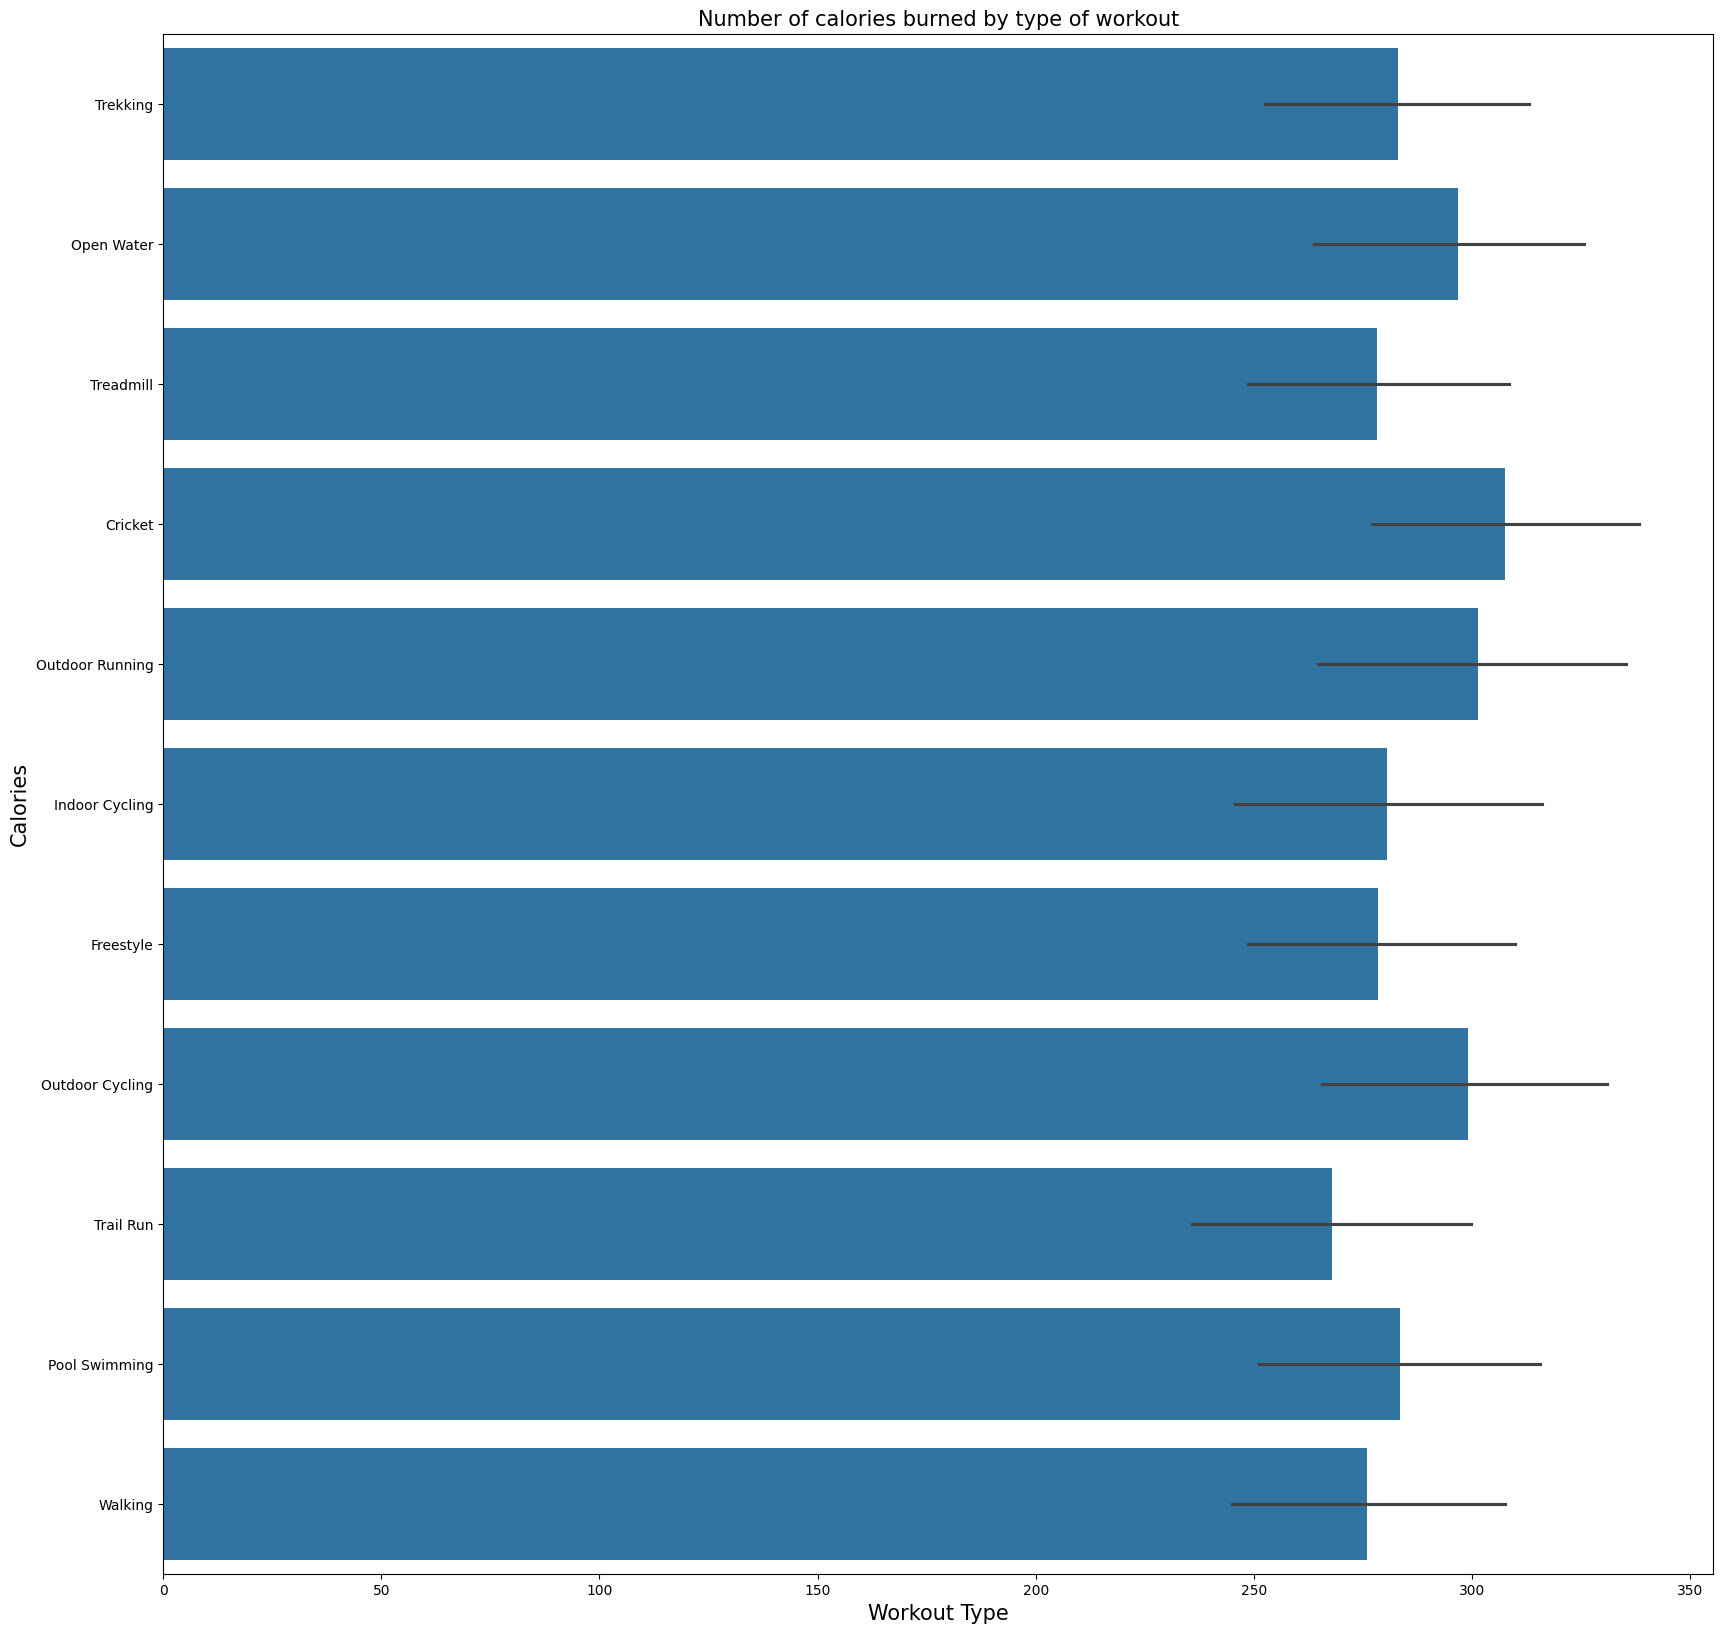

In [ ]:
data = data.sort_values(['calories'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=data["calories"],y=data["workout_type"])
plt.xlabel("Workout Type",fontsize=15)
plt.ylabel("Calories",fontsize=15)
plt.title("Number of calories burned by type of workout",fontsize=15)
plt.show()

Although walking is the most performed physical activity, it is one that burns fewer calories.

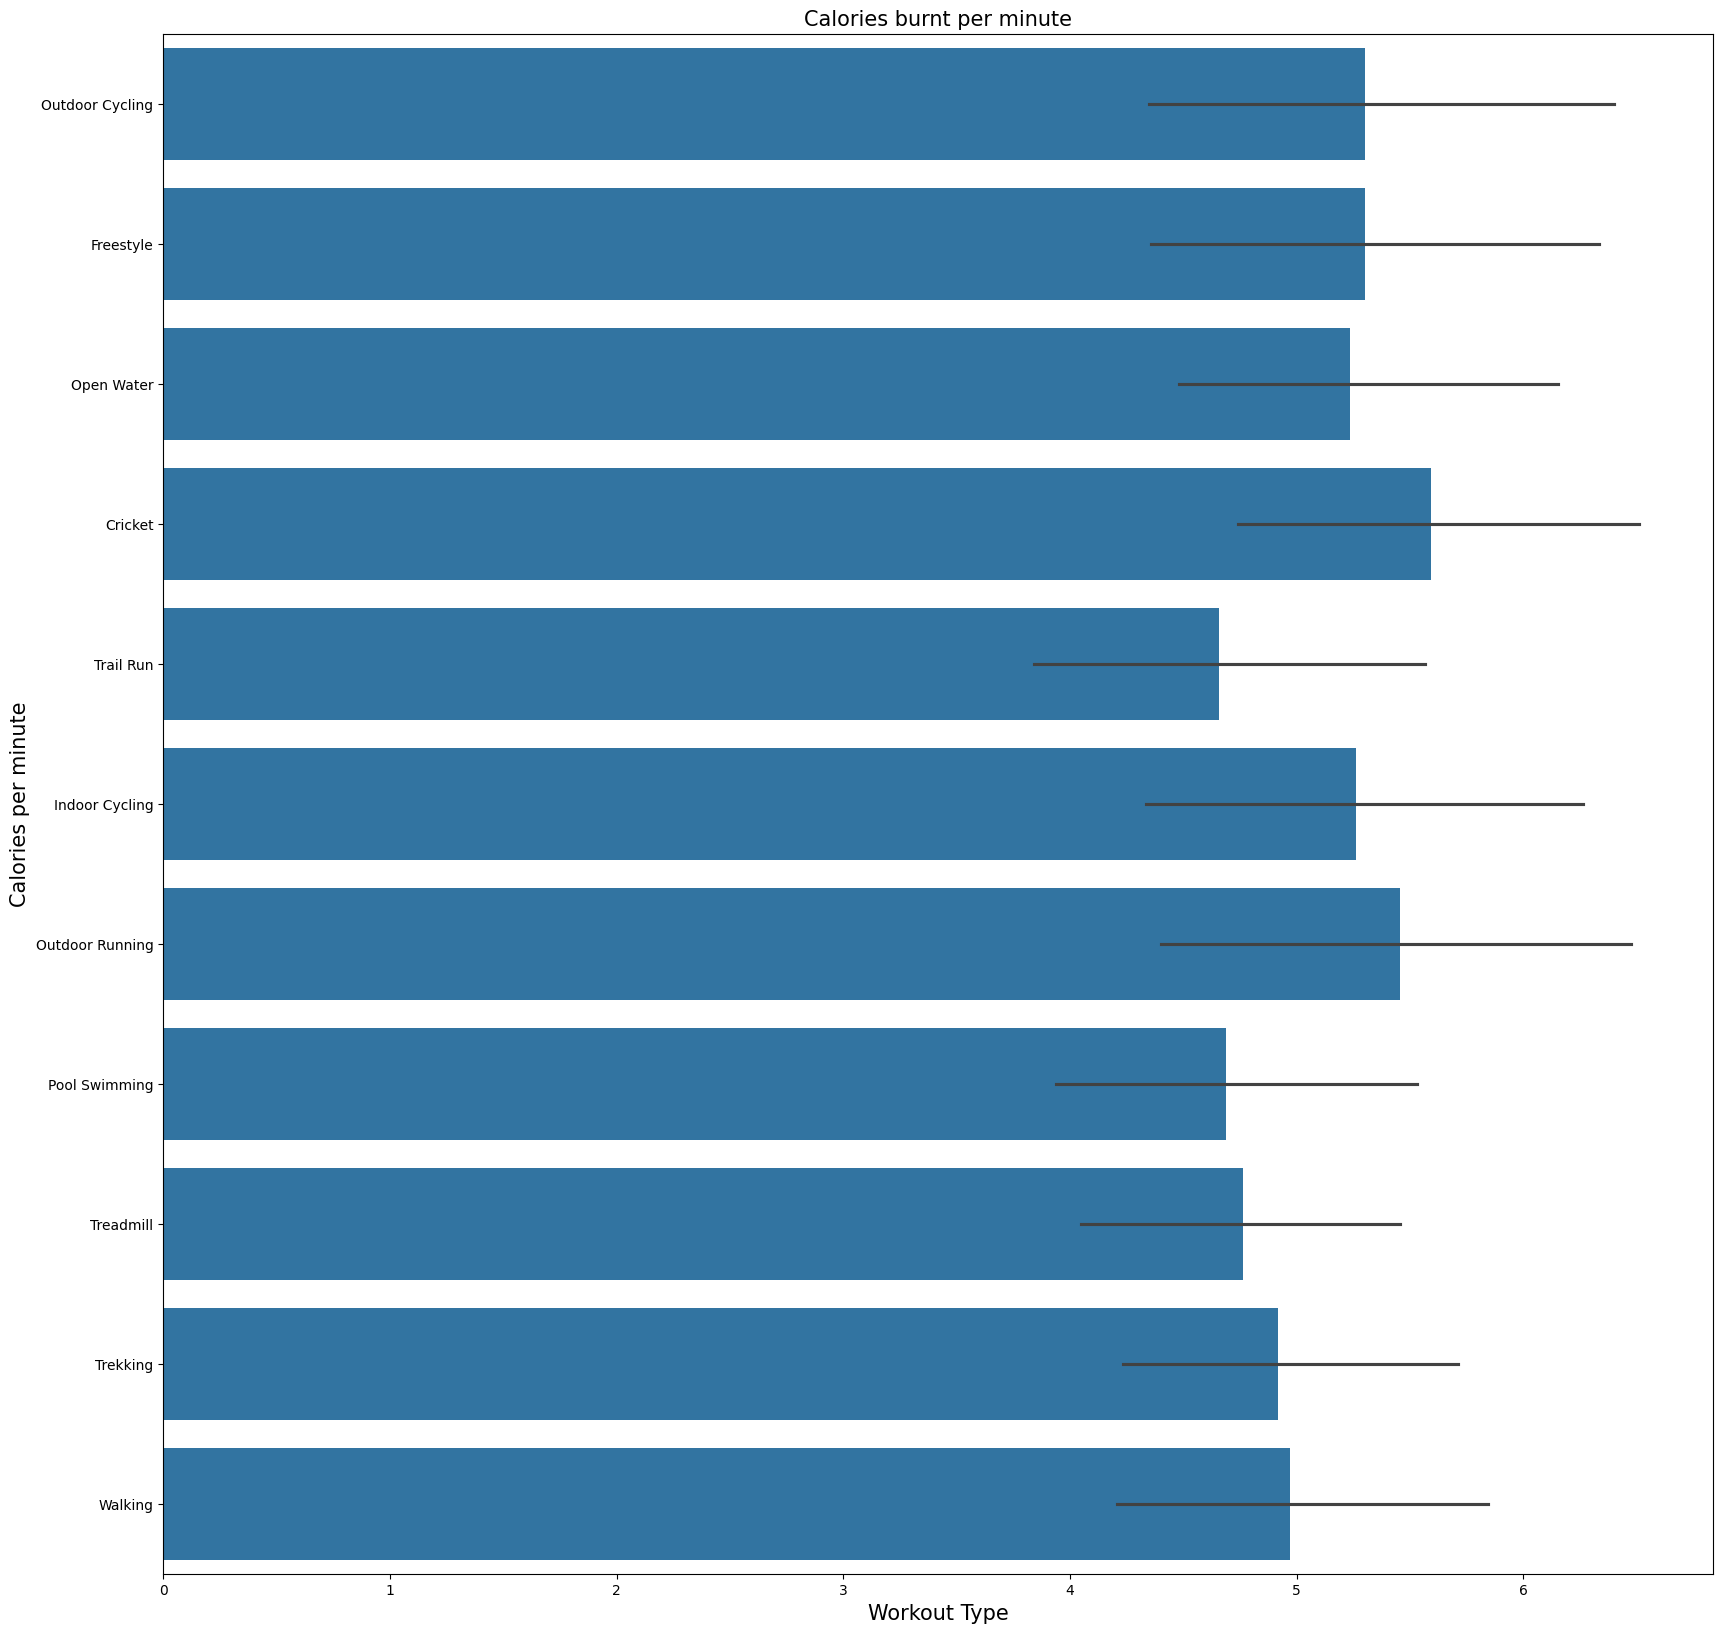

In [ ]:
data = data.sort_values(['calories_per_minute'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(20,20))
sns.barplot(x=data["calories_per_minute"],y=data["workout_type"])
plt.xlabel("Workout Type",fontsize=15)
plt.ylabel("Calories per minute",fontsize=15)
plt.title("Calories burnt per minute",fontsize=15)
plt.show()

Since walking now ranks seventh, it appears that a treadmill is less effective at burning calories than walking itself. Additionally, cricket and outdoor running seem to be the most effective activities for calorie burning based on the data.

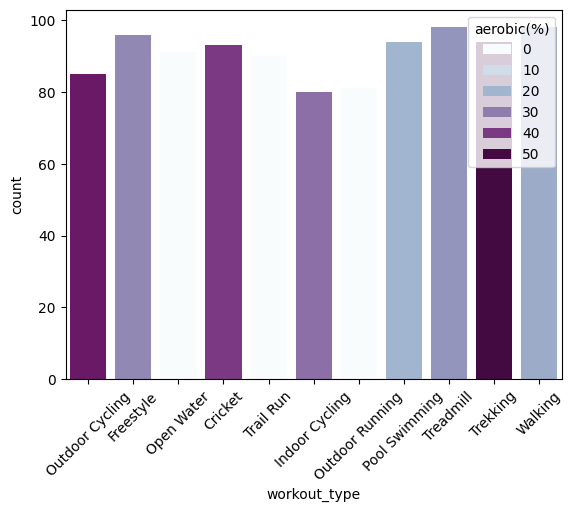

In [ ]:
sns.countplot(x='workout_type', data=data, hue="aerobic(%)", palette='BuPu')
plt.xticks(rotation=45)
plt.show()

As we can see workouts like Trekking, Cricket and indoor/outdoor Cycling have higher aerobic rate

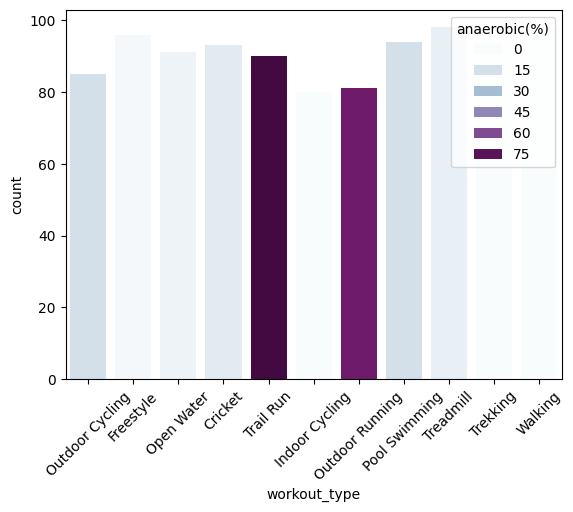

In [ ]:
sns.countplot(x='workout_type', data=data, hue="anaerobic(%)", palette='BuPu')
plt.xticks(rotation=45)
plt.show()

Workouts like outdoor running and trail running have the highest anaerobic rates because they typically require runners to sprint up steep hills or power through technical terrain.



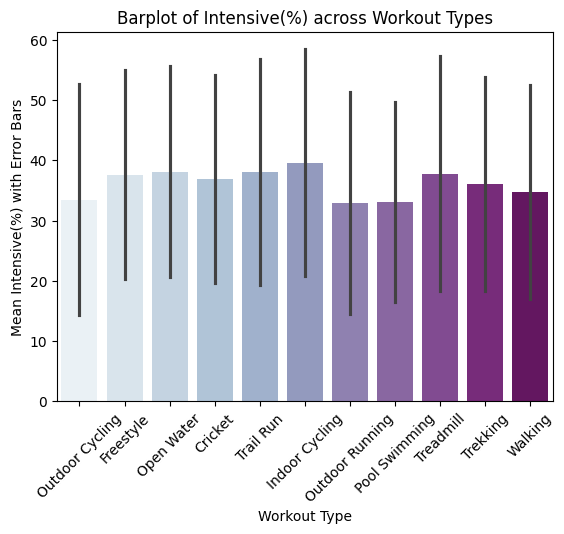

In [ ]:
sns.barplot(x='workout_type', y='intensive(%)', data=data, ci='sd', palette='BuPu')
plt.title('Barplot of Intensive(%) across Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Mean Intensive(%) with Error Bars')
plt.xticks(rotation=45)
plt.show()

Based on the data, indoor cycling appears to be the most intensive workout, followed by open water swimming, trail running, and then treadmill running.

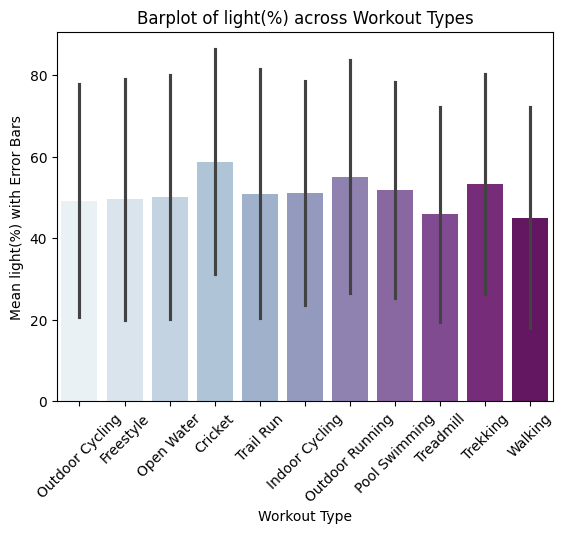

In [ ]:
sns.barplot(x='workout_type', y='light(%)', data=data, ci='sd', palette='BuPu')
plt.title('Barplot of light(%) across Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Mean light(%) with Error Bars')
plt.xticks(rotation=45)
plt.show()

Based on the data, Cricket appears to be the least intensive workout, followed by outdoor running, pool swimming and then trekking.

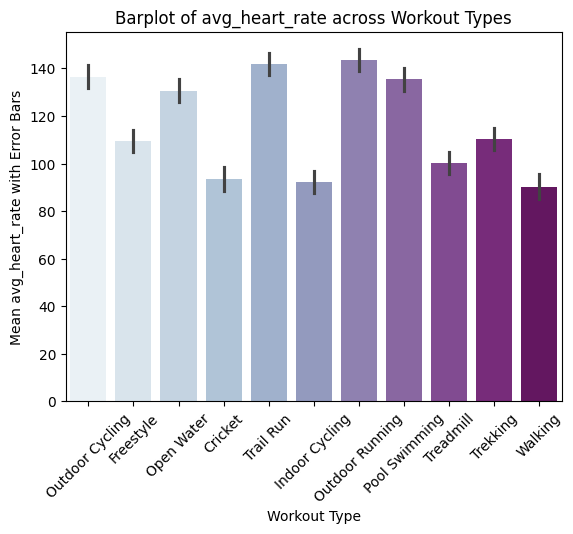

In [ ]:
sns.barplot(x='workout_type', y='avg_heart_rate', data=data, ci='sd', palette='BuPu')
plt.title('Barplot of avg_heart_rate across Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Mean avg_heart_rate with Error Bars')
plt.xticks(rotation=45)
plt.show()

Outdoor running and trail running have the highest mean average heart rate compared to other workout types, which is consistent with their finding of the highest anaerobic rates in these activities. Conversely, cricket, indoor cycling, and walking have the lowest average heart rate, which aligns with their high aerobic rates.

## **Label Encoding of objects :**

In [ ]:
data["workout_type"].unique()

array(['Outdoor Cycling', 'Freestyle', 'Open Water', 'Cricket',
       'Trail Run', 'Indoor Cycling', 'Outdoor Running', 'Pool Swimming',
       'Treadmill', 'Trekking', 'Walking'], dtype=object)

In [ ]:
label_encoding=preprocessing.LabelEncoder()
cols=['workout_type']
for i in cols:
  data[i]=label_encoding.fit_transform(data[i])

In [ ]:
high_corr = []
low_corr = []
bad_corr = []
for col in data.columns:
  relation = data['calories_classes'].corr(data[col])
  if(relation > 0):
    if relation >= 0.7 and relation < 0.95 :
      # print(f"relation between {col} & diagnosis is high positive \n {relation}")
      high_corr.append(col)
    elif relation >= 0.4 and relation < 0.7 :
      # print(f"relation between {col} & diagnosis is low positive \n {relation}")
      low_corr.append(col)
    else: bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low positive \n {relation}")
  else:
    if relation <= -0.7 and relation > -0.95 :
      # print(f"relation between {col} & diagnosis is high negative \n {relation}")
      high_corr.append(col)
    elif relation <= -0.4 and relation > -0.7 :
      # print(f"relation between {col} & diagnosis is low negative \n {relation}")
      low_corr.append(col)
    else: bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low negative \n {relation}")

print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")

the high corr are ['calories']
the low corr are ['calories_per_minute']
the bad corr are ['workout_type', 'distance', 'time', 'total_steps', 'avg_speed', 'avg_cadence', 'max_cadence', 'avg_heart_rate', 'max_heart_rate', 'min_heart_rate', 'vo2_max(%)', 'aerobic(%)', 'anaerobic(%)', 'intensive(%)', 'light(%)', 'calories_classes', 'heart_level']


In [ ]:
high_corr = []
low_corr = []
bad_corr = []
for col in data.columns:
  relation = data['heart_level'].corr(data[col])
  if(relation > 0):
    if relation >= 0.7 and relation < 0.95 :
      # print(f"relation between {col} & diagnosis is high positive \n {relation}")
      high_corr.append(col)
    elif relation >= 0.4 and relation < 0.7 :
      # print(f"relation between {col} & diagnosis is low positive \n {relation}")
      low_corr.append(col)
    else: bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low positive \n {relation}")
  else:
    if relation <= -0.7 and relation > -0.95 :
      # print(f"relation between {col} & diagnosis is high negative \n {relation}")
      high_corr.append(col)
    elif relation <= -0.4 and relation > -0.7 :
      # print(f"relation between {col} & diagnosis is low negative \n {relation}")
      low_corr.append(col)
    else: bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low negative \n {relation}")

print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")

the high corr are ['avg_heart_rate', 'max_heart_rate']
the low corr are ['aerobic(%)', 'anaerobic(%)']
the bad corr are ['workout_type', 'distance', 'time', 'calories', 'total_steps', 'avg_speed', 'avg_cadence', 'max_cadence', 'min_heart_rate', 'vo2_max(%)', 'intensive(%)', 'light(%)', 'calories_per_minute', 'calories_classes', 'heart_level']


## **Feature Transformation :**

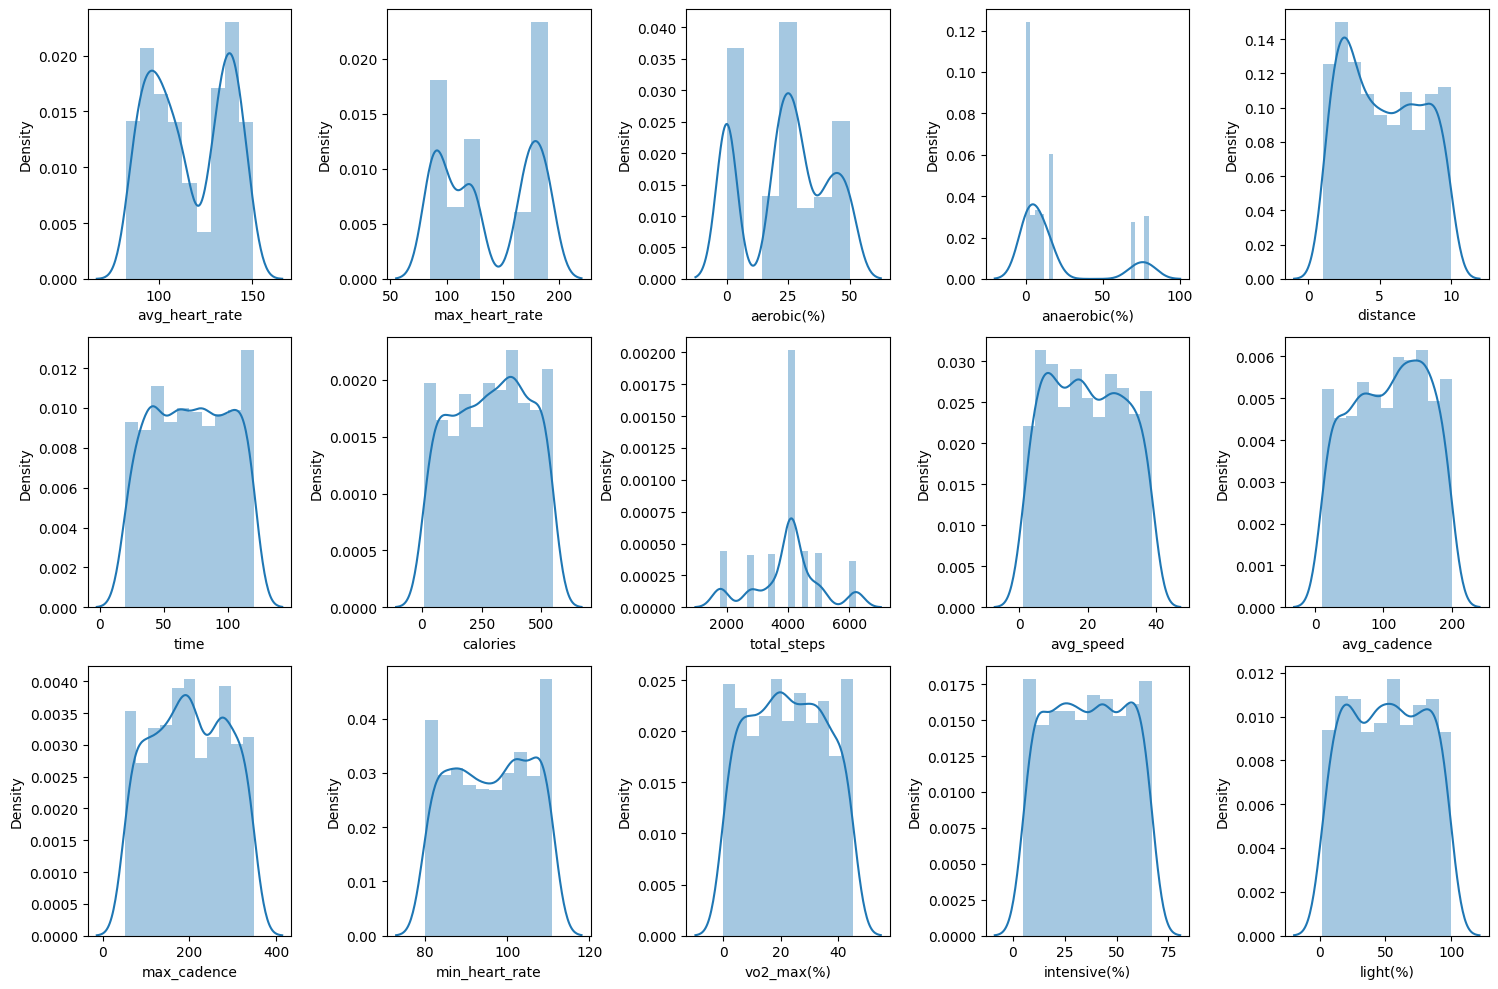

In [ ]:
#visualization on data features to know they are skewed or not
features_to_plot = ['avg_heart_rate', 'max_heart_rate','aerobic(%)', 'anaerobic(%)','distance', 'time', 'calories', 'total_steps', 'avg_speed', 'avg_cadence', 'max_cadence', 'min_heart_rate', 'vo2_max(%)', 'intensive(%)', 'light(%)']
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 10))

for i, col in enumerate(features_to_plot):
    row_index = i // 5
    col_index = i % 5
    sns.distplot(data[col], ax=axes[row_index, col_index])

plt.tight_layout()
plt.show()

OBSERVATION: Data is not skewed to make feature transformation

##  **Feature Scaling :**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [ ]:
#scaling data in range of 0 to 1
scaler = MinMaxScaler()

In [ ]:
columns_to_scale = ["distance", "time", "calories", "total_steps", "avg_speed",
                    "avg_cadence", "max_cadence", "avg_heart_rate", "max_heart_rate",
                    "min_heart_rate", "vo2_max(%)", "aerobic(%)", "anaerobic(%)",
                    "intensive(%)", "light(%)"]



# Fit and transform the selected columns
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

In [ ]:
data.head()

,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%),calories_per_minute,calories_classes,heart_level
0,4,0.030033,0.00,0.970370,0.519014,0.964380,0.697390,0.353051,0.897059,0.876190,0.967742,0.311111,0.90,0.1875,0.370968,0.163265,26.700000,2,2
1,1,0.156841,0.00,0.957407,0.519014,0.762533,0.677511,0.531181,0.411765,0.352381,0.612903,0.088889,0.56,0.0250,0.629032,0.663265,26.350000,2,2
2,3,0.245829,0.00,0.918519,0.519014,0.972559,0.903876,0.403449,0.698529,0.771429,0.451613,0.155556,0.00,0.0625,0.596774,0.826531,25.300000,2,2
3,0,0.934372,0.03,0.970370,0.375000,0.058575,0.435908,0.148453,0.117647,0.066667,0.290323,0.133333,0.80,0.1250,0.500000,0.112245,23.217391,2,1
4,7,0.160178,0.02,0.905556,0.227170,0.196834,0.684102,0.211350,0.786765,0.980952,0.129032,0.800000,0.00,1.0000,0.677419,0.285714,22.681818,2,2


## **MODEL SELECTION :**

`implement three concepts`

1-classifiy calories into two category

2-classifiy workout Type

3-classifiy Heart Rate Level

In [ ]:
data.columns

Index(['workout_type', 'distance', 'time', 'calories', 'total_steps',
       'avg_speed', 'avg_cadence', 'max_cadence', 'avg_heart_rate',
       'max_heart_rate', 'min_heart_rate', 'vo2_max(%)', 'aerobic(%)',
       'anaerobic(%)', 'intensive(%)', 'light(%)', 'calories_per_minute',
       'calories_classes', 'heart_level'],
      dtype='object')

### ***`Workout Classification`***

In [ ]:
X= data.drop("workout_type", axis=1)
Y = data["workout_type"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape)

(700, 18)


#### **1)LOGISTIC REGRESSION :**

In [ ]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(random_state =0)

In [ ]:
#Cross-validation is used to assess the performance of a predictive model. The dataset is divided into 10 subsets (or folds)
scores_log = cross_val_score(LogReg, X_train, y_train, cv=10,scoring="accuracy")
print(scores_log.mean())

0.9485714285714286


In [ ]:
#predict test data
LogReg.fit(X_train, y_train)
y_prd_logtr=LogReg.predict(X_train)
y_prd_logts=LogReg.predict(X_test)
print("Accuracy",metrics.accuracy_score(y_prd_logtr,y_train))
print("Accuracy",metrics.accuracy_score(y_prd_logts,y_test))

Accuracy 0.9685714285714285
Accuracy 0.9433333333333334


In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test,y_prd_logts)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [ ]:
#predection of test data
y_pred = LogReg.predict(X_test)
class_report=classification_report(y_test, y_pred)
print(class_report)
accuracy_score(y_test, y_pred)

#### **2) K NEAREST NEIGHBOR :**

In [ ]:
arr=[]
for k in range (3,16,2):
    model2= KNeighborsClassifier(n_neighbors=k)
    model2=model2.fit(X_train,y_train)
    s=model2.score(X_test, y_test)
    arr.append(s)

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(3,16,2),arr,color='blue')

In [ ]:
model2= KNeighborsClassifier(n_neighbors=2)

In [ ]:
model2.fit(X_train,y_train)

In [ ]:
y_pred2tr = model2.predict(X_train)
y_pred2ts = model2.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(y_train,y_pred2tr)}")
print(f"Accuracy = {accuracy_score(y_test,y_pred2ts)}")

#### **3) DECISION TREE :**

In [ ]:
l1=[]
l2=[]
for i in range (1,16):
    dt1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
    dt1.fit(X_train,y_train)
    dt2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
    dt2.fit(X_train,y_train)
    l1.append(dt1.score(X_test, y_test))
    l2.append(dt2.score(X_test, y_test))

In [ ]:
plt.plot(range(1,16),l1,label="entropy",color='green')
plt.plot(range(1,16),l2,label="gini",color='blue')
plt.legend()

In [ ]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state = 42)

In [ ]:
model3.fit(X_train,y_train)

In [ ]:
y_pred3=model3.predict(X_test)

In [ ]:
print(f"Accuracy = {accuracy_score(y_test,y_pred3)}")

#### **4) Random Forest :**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
l1=[]
l2=[]
for i in range (1,22):
    rf1=RandomForestClassifier(n_estimators=i,criterion="entropy",random_state=42)
    rf1.fit(X_train,y_train)
    rf2=RandomForestClassifier(n_estimators=i,criterion="gini",random_state=42)
    rf2.fit(X_train,y_train)
    l1.append(rf1.score(X_test, y_test))
    l2.append(rf2.score(X_test, y_test))

In [ ]:
plt.plot(range(1,22),l1,label="entropy",color='green')
plt.plot(range(1,22),l2,label="gini",color='blue')
plt.legend()

In [ ]:
model4 = RandomForestClassifier(n_estimators = 3, criterion = 'gini', random_state = 42)

In [ ]:
model4.fit(X_train, y_train)

In [ ]:
y_pred4=model4.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(y_test,y_pred4)}")

In [ ]:
print("_"*50)
print(model4.score(X_train, y_train))
print(model4.score(X_test, y_test))

print("_"*50)

In [ ]:
# confusion_matrix
plt.figure(figsize=(14,8))
Cm = confusion_matrix(y_test,y_pred4)

In [ ]:
sns.heatmap(Cm,annot=True, fmt="d", cmap="spring_r")
plt.show()

#### **CREATING ACCURACY TABLE :**


In [ ]:
#creating a dataframe to compare between the accuracy of each model
model={'models':['logistic regression','KNN','desicion tree','random forest'],'accuracy':[metrics.accuracy_score(y_prd_logts,y_test),metrics.accuracy_score(y_test,y_pred2ts),metrics.accuracy_score(y_test,y_pred3),metrics.accuracy_score(y_test,y_pred4)]}
model_df=pd.DataFrame(model)
model_df

In [ ]:
#visualizing the accuracy of each model
sns.barplot(x='models',y='accuracy',data=model_df)

### ***`Calories Classification`***

In [ ]:
X2= data.drop("calories_classes", axis=1)
Y2 = data["calories_classes"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.3,random_state=0)
print(X_train2.shape)

#### **1)LOGISTIC REGRESSION :**

In [ ]:
LogReg = LogisticRegression(random_state = 0)

In [ ]:
#Cross-validation is used to assess the performance of a predictive model. The dataset is divided into 10 subsets (or folds)
scores_log = cross_val_score(LogReg, X_train2, y_train2, cv=10,scoring="accuracy")
print(scores_log.mean())

In [ ]:
#predict test data
LogReg.fit(X_train2, y_train2)
y_prd_log2tr=LogReg.predict(X_train2)
y_prd_log2ts=LogReg.predict(X_test2)
print("Accuracy",metrics.accuracy_score(y_prd_log2tr,y_train2))
print("Accuracy",metrics.accuracy_score(y_prd_log2ts,y_test2))

In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test2,y_prd_log2ts)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [ ]:
#predection of test data
class_report=classification_report(y_test2, y_prd_log2ts)
print(class_report)
accuracy_score(y_test2,y_prd_log2ts)

#### **2) K NEAREST NEIGHBOR :**

In [ ]:
array=[]
for k in range (3,16,2):
    modelknn= KNeighborsClassifier(n_neighbors=k)
    modelknn=modelknn.fit(X_train2,y_train2)
    s=modelknn.score(X_test2, y_test2)
    array.append(s)

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(3,16,2),array,color='blue')

In [ ]:
modelknn= KNeighborsClassifier(n_neighbors=11)

In [ ]:
modelknn.fit(X_train2,y_train2)

In [ ]:
y_pred2knnts = modelknn.predict(X_test2)
y_pred2knntr = modelknn.predict(X_train2)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(y_train2,y_pred2knntr)}")
print(f"Accuracy = {accuracy_score(y_test2,y_pred2knnts)}")

#### **3) DECISION TREE :**

In [ ]:
l1=[]
l2=[]
for i in range (1,16):
    dt1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
    dt1.fit(X_train2,y_train2)
    dt2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
    dt2.fit(X_train2,y_train2)
    l1.append(dt1.score(X_test2, y_test2))
    l2.append(dt2.score(X_test2, y_test2))

In [ ]:
plt.plot(range(1,16),l1,label="entropy",color='green')
plt.plot(range(1,16),l2,label="gini",color='blue')
plt.legend()

In [ ]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 42)

In [ ]:
model3.fit(X_train2,y_train2)

In [ ]:
y_pred3=model3.predict(X_test2)

In [ ]:
print(f"Accuracy = {accuracy_score(y_test2,y_pred3)}")

#### **4) Random Forest :**

In [ ]:

l1=[]
l2=[]
for i in range (1,22):
    rf1=RandomForestClassifier(n_estimators=i,criterion="entropy",random_state=42)
    rf1.fit(X_train2,y_train2)
    rf2=RandomForestClassifier(n_estimators=i,criterion="gini",random_state=42)
    rf2.fit(X_train2,y_train2)
    l1.append(rf1.score(X_test2, y_test2))
    l2.append(rf2.score(X_test2, y_test2))

In [ ]:
plt.plot(range(1,22),l1,label="entropy",color='green')
plt.plot(range(1,22),l2,label="gini",color='blue')
plt.legend()

In [ ]:
model4 = RandomForestClassifier(n_estimators = 3, criterion = 'gini', random_state = 42)

In [ ]:
model4.fit(X_train2, y_train2)

In [ ]:
y_pred4=model4.predict(X_test2)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(y_test2,y_pred4)}")

#### **CREATING ACCURACY TABLE :**

In [ ]:
#creating a dataframe to compare between the accuracy of each model
model={'models':['logistic regression','KNN','desicion tree','random forest'],'accuracy':[metrics.accuracy_score(y_prd_log2ts,y_test2),metrics.accuracy_score(y_test2,y_pred2knnts),metrics.accuracy_score(y_test2,y_pred3),metrics.accuracy_score(y_test2,y_pred4)]}
model_df=pd.DataFrame(model)
model_df

In [ ]:
#visualizing the accuracy of each model
sns.barplot(x='models',y='accuracy',data=model_df)

### ***`Heart Level Classification`***

In [ ]:
X3= data.drop("heart_level", axis=1)
Y3 = data["heart_level"]

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.3,random_state=0)
print(X_train3.shape)

In [ ]:
mutual_info = mutual_info_regression(X2, Y2)
feature_importance = pd.Series(mutual_info, index=X2.columns).sort_values(ascending=False)

In [ ]:
print(feature_importance)

#### **1)LOGISTIC REGRESSION :**

In [ ]:
LogReg = LogisticRegression(random_state = 0)

In [ ]:
#Cross-validation is used to assess the performance of a predictive model. The dataset is divided into 10 subsets (or folds)
scores_log = cross_val_score(LogReg, X_train3, y_train3, cv=10,scoring="accuracy")
print(scores_log.mean())

In [ ]:
#predict test data
LogReg.fit(X_train3, y_train3)
y_prd_log3tr=LogReg.predict(X_train3)
y_prd_log3ts=LogReg.predict(X_test3)
print("Accuracy",metrics.accuracy_score(y_prd_log3tr,y_train3))
print("Accuracy",metrics.accuracy_score(y_prd_log3ts,y_test3))

In [ ]:
#Confusion metrix
cm=confusion_matrix(y_test3,y_prd_log3ts)
cmd=metrics.ConfusionMatrixDisplay(cm)
cmd.plot()
plt.show()

In [ ]:
#predection of test data
class_report=classification_report(y_test3, y_prd_log3ts)
print(class_report)
accuracy_score(y_test3,y_prd_log3ts)

#### **2) K NEAREST NEIGHBOR :**

In [ ]:
array=[]
for k in range (3,16,2):
    modelknn= KNeighborsClassifier(n_neighbors=k)
    modelknn=modelknn.fit(X_train3,y_train3)
    s=modelknn.score(X_test3, y_test3)
    array.append(s)

In [ ]:
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(3,16,2),array,color='blue')

In [ ]:
modelknn= KNeighborsClassifier(n_neighbors=3)

In [ ]:
modelknn.fit(X_train3,y_train3)

In [ ]:
y_pred3knnts = modelknn.predict(X_test3)
y_pred3knntr = modelknn.predict(X_train3)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(y_train3,y_pred3knntr)}")
print(f"Accuracy = {accuracy_score(y_test3,y_pred3knnts)}")

#### ***Decision Tree***

In [ ]:
l1=[]
l2=[]
for i in range (1,16):
    dt1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
    dt1.fit(X_train3,y_train3)
    dt2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
    dt2.fit(X_train3,y_train3)
    l1.append(dt1.score(X_test3, y_test3))
    l2.append(dt2.score(X_test3, y_test3))

In [ ]:
plt.plot(range(1,16),l1,label="entropy",color='green')
plt.plot(range(1,16),l2,label="gini",color='blue')
plt.legend()

In [ ]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state = 42)

In [ ]:
model3.fit(X_train3,y_train3)

In [ ]:
y_pred3=model3.predict(X_test3)

In [ ]:
print(f"Accuracy = {accuracy_score(y_test3,y_pred3)}")

In [ ]:

print("_"*50)
print(model3.score(X_train3, y_train3))
print(model3.score(X_test3, y_test3))
print("_"*50)


In [ ]:
# confusion_matrix
plt.figure(figsize=(14,8))
Cm = confusion_matrix(y_test3,y_pred3)

In [ ]:
sns.heatmap(Cm,annot=True, fmt="d", cmap="spring_r")
plt.show()

#### **4) Random Forest :**

In [ ]:

l1=[]
l2=[]
for i in range (1,22):
    rf1=RandomForestClassifier(n_estimators=i,criterion="entropy",random_state=42)
    rf1.fit(X_train3,y_train3)
    rf2=RandomForestClassifier(n_estimators=i,criterion="gini",random_state=42)
    rf2.fit(X_train3,y_train3)
    l1.append(rf1.score(X_test3, y_test3))
    l2.append(rf2.score(X_test3, y_test3))

In [ ]:
plt.plot(range(1,22),l1,label="entropy",color='green')
plt.plot(range(1,22),l2,label="gini",color='blue')
plt.legend()

In [ ]:
model4 = RandomForestClassifier(n_estimators = 3, criterion = 'gini', random_state = 42)

In [ ]:
model4.fit(X_train3, y_train3)

In [ ]:
y_pred4=model4.predict(X_test3)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(y_test3,y_pred4)}")

#### **CREATING ACCURACY TABLE :**

In [ ]:
#creating a dataframe to compare between the accuracy of each model
model={'models':['logistic regression','KNN','desicion tree','random forest'],'accuracy':[metrics.accuracy_score(y_test3,y_prd_log3ts),metrics.accuracy_score(y_test3,y_pred3knnts),metrics.accuracy_score(y_test3,y_pred3),metrics.accuracy_score(y_test3,y_pred4)]}
model_df=pd.DataFrame(model)
model_df

In [ ]:
#visualizing the accuracy of each model
sns.barplot(x='models',y='accuracy',data=model_df)